In [59]:
import numpy as np
import pandas as pd
import numpy.random as rnd
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [60]:
mydir = os.getcwd()
housing = pd.read_csv(mydir + '/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [61]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [62]:
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

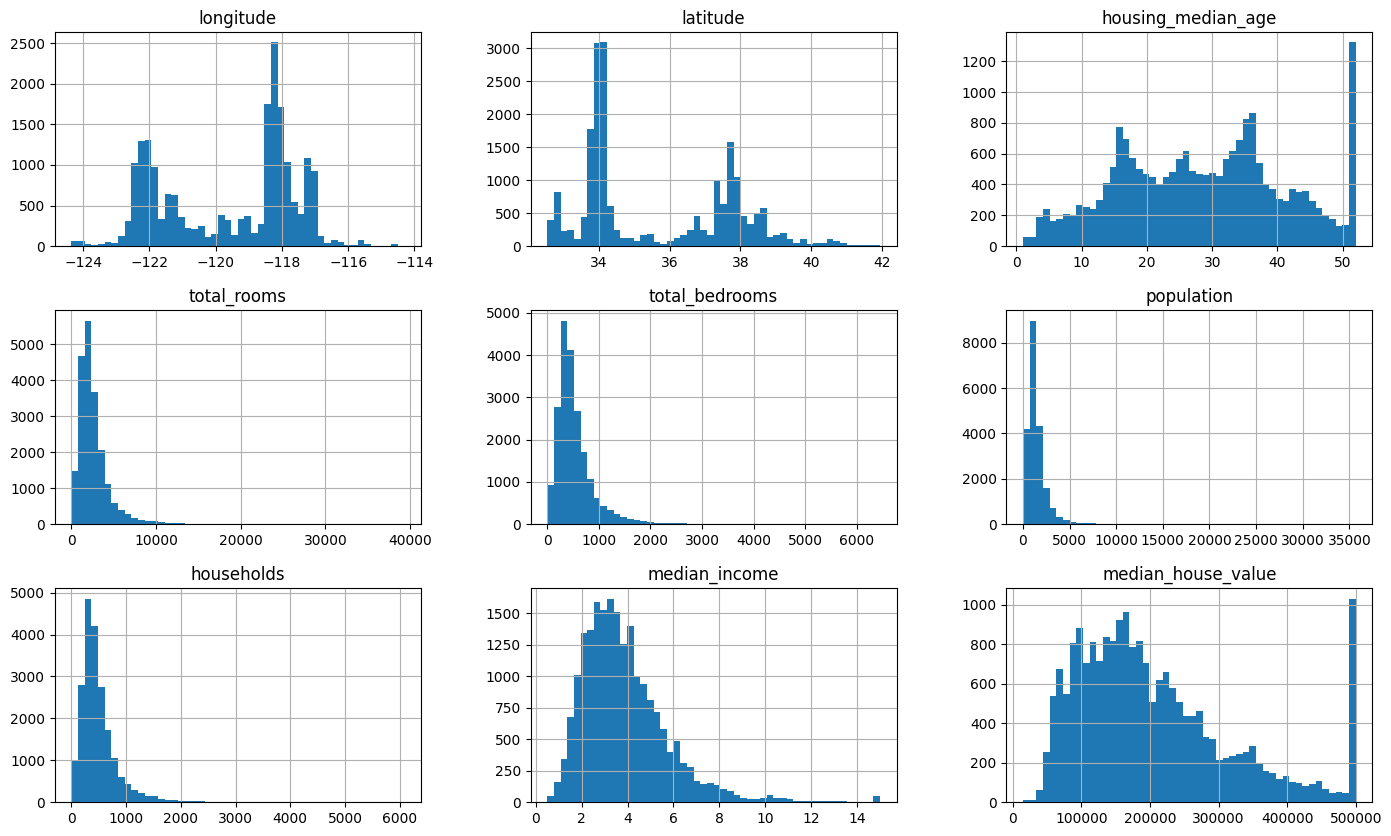

In [63]:
#Membuat histogram untuk berbagai fitur
housing.hist(bins=50, figsize=(17,10))
plt.show()

In [64]:
#Pemisahan dataset menjadi data latih (80%) dan data uji (20%) menggunakan pengambilan sampel acak
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<Axes: >

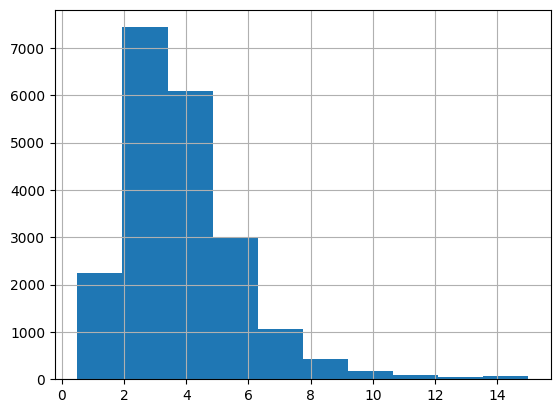

In [65]:
# menganalisis distribusi dari dataset perumahan dengan memeriksa kemiringan pada fitur "median_income". s
housing["median_income"].hist()

In [66]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 14, 5.0, inplace=True)
housing["income_cat"].value_counts()

income_cat
3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: count, dtype: int64


Karena dataset ini condong ke kanan (positively skewed), kita menggunakan pengambilan sampel stratifikasi untuk memastikan bahwa kita memiliki distribusi sampel yang sama di kedua dataset uji dan latih.

In [67]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [68]:
# membandingkan kesalahan (error) untuk dataset yang diambil secara acak dan dataset yang diambil dengan sampel stratifikasi terhadap dataset asli.
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [69]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.068944,0.069041,0.064922,-5.832748,0.140548
6.0,0.025775,0.025678,0.024709,-4.135338,-0.375940
7.0,0.009157,0.009205,0.008721,-4.761905,0.529101
8.0,0.005087,0.005087,0.005572,9.523810,0.000000
9.0,0.002422,0.002422,0.002665,10.000000,0.000000


dapat di lihat bahwa kesalahan dari sampel stratifikasi lebih kecil daripada kesalahan dari sampel acak, yang berarti distribusi keseluruhan dataset lebih cocok dengan dataset sampel stratifikasi daripada dataset sampel acak.Selanjutnyaa hapus kolom income_cat karena kolom ini tidak berkorelasi dengan harga rumah.

In [70]:

for set in (strat_train_set, strat_test_set):
    set.drop("income_cat", axis=1, inplace=True)

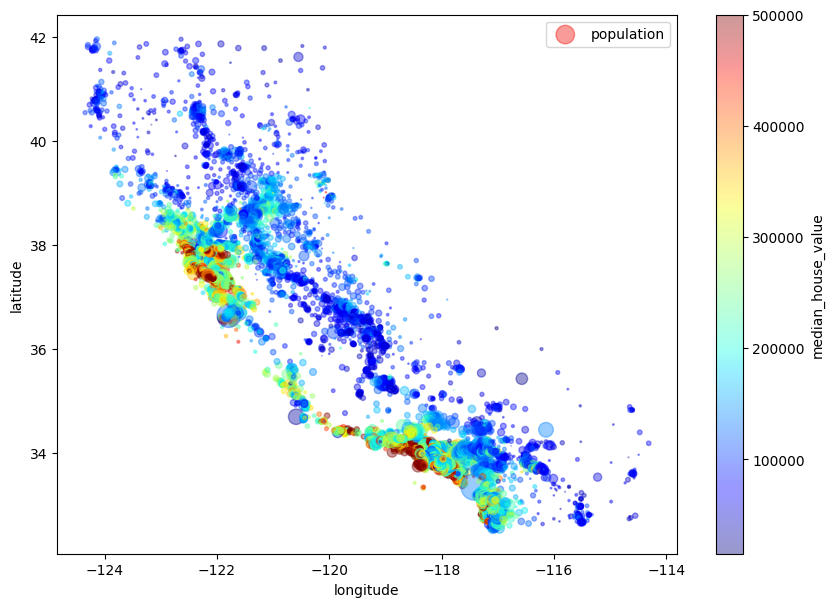

In [71]:
# membuat plot untuk melihat peran dari lintang, bujur, dan populasi terhadap harga rumah yang diambil bersama-sama.

housing.plot(kind="scatter", x="longitude", y="latitude", s=housing['population']/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, alpha=0.4, figsize=(10,7),)
plt.legend()
plt.show()

In [72]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# Karena atribut total_bedrooms memiliki beberapa nilai yang hilang, maka ganti ruang kosong dengan median.
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
15698,-122.46,37.79,52.0,899.0,96.0,304.0,110.0,14.2959,NEAR BAY
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [73]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.iloc[21:24]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
21,-122.02,37.30,32.0,2134.0,328.0,903.0,322.0,6.3590
22,-120.66,35.49,17.0,4422.0,945.0,2307.0,885.0,2.8285
23,-117.25,34.16,37.0,1709.0,278.0,744.0,274.0,3.7188


In [74]:
# Converting text to numbers
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 3, 4, ..., 1, 0, 3])

In [75]:
# membuat matriks jarang (sparse matrix) dari variabel kategorikal dengan beberapa kategori 
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [76]:
# Feature Scaling
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
housing_prepared = num_pipeline.fit_transform(housing_num)

In [77]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

encoder = OneHotEncoder()

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('encoder', encoder),  # Menggunakan OneHotEncoder di sini
    ])

preparation_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])
housing_prepared = preparation_pipeline.fit_transform(housing)
print(housing_prepared)


  (0, 0)	-1.1578862141710566
  (0, 1)	0.7738869721565762
  (0, 2)	0.7444069599058398
  (0, 3)	-0.49193928344376775
  (0, 4)	-0.446612532277374
  (0, 5)	-0.6358874163297619
  (0, 6)	-0.4219392624913622
  (0, 7)	-0.6156781116553287
  (0, 8)	-0.3120069913021732
  (0, 9)	-0.08649925999555866
  (0, 10)	0.16633179900181747
  (0, 11)	1.0
  (1, 0)	-1.4425951196188687
  (1, 1)	1.0077625994571748
  (1, 2)	1.8570897404479023
  (1, 3)	-0.8022900111227407
  (1, 4)	-1.0664634586166355
  (1, 5)	-0.9985036897979713
  (1, 6)	-1.0308239877996437
  (1, 7)	5.488325158187767
  (1, 8)	1.044385611080725
  (1, 9)	-0.028728440841315372
  (1, 10)	-1.7203502485459439
  (1, 14)	1.0
  (2, 0)	1.1847186394258797
  :	:
  (16509, 12)	1.0
  (16510, 0)	0.7801323001052988
  (16510, 1)	-0.849209881309579
  (16510, 2)	0.1880655696348086
  (16510, 3)	-0.31008952970661174
  (16510, 4)	-0.3761196818309482
  (16510, 5)	-0.05891669549118225
  (16510, 6)	-0.37673821301432825
  (16510, 7)	0.099580878952423
  (16510, 8)	0.02457121

In [82]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)

# Menghitung MAE
mae = mean_absolute_error(housing_labels, housing_predictions)

# Menghitung MSE
mse = mean_squared_error(housing_labels, housing_predictions)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R^2 Square
r2 = r2_score(housing_labels, housing_predictions)

# Menampilkan hasil
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Square:", r2)


Mean Absolute Error (MAE): 81723.54432485165
Mean Squared Error (MSE): 12302090941.493492
Root Mean Squared Error (RMSE): 110914.79135576775
R^2 Square: 0.07914580351687195


In [ ]:
import matplotlib.pyplot as plt

# Membuat scatter plot
plt.scatter(housing_labels, housing_predictions)

# Menambahkan label dan judul
plt.xlabel('Actual Housing Prices')
plt.ylabel('Predicted Housing Prices')
plt.title('Actual vs. Predicted Housing Prices')


# Menampilkan plot
plt.show()
